<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/GBM_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

### **Questão 1**

 - Separe o conjunto em treinamento (80%) e teste (20%)
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos
 - Dica: O Sklearn não trabalha com atributos nominais em árvores de decisão

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')


from sklearn.pipeline import Pipeline


In [ ]:
!pip install kaggle

In [ ]:
import zipfile

!kaggle datasets download -d mariolisboa/breast-cancer-wisconsin-original-data-set --force

with zipfile.ZipFile('breast-cancer-wisconsin-original-data-set.zip', 'r') as zip_ref:
    zip_ref.extractall()


df = pd.read_csv('breast_cancer_bd.csv', na_values='?')

df.head()


Dataset URL: https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set
License(s): unknown
  0% 0.00/5.93k [00:00<?, ?B/s]
100% 5.93k/5.93k [00:00<00:00, 6.96MB/s]


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
#dados = pd.read_csv('breast-cancer-wisconsin.data')
#dados = pd.read_csv('/content/drive/MyDrive/docs compartilhados /Aprendizado de Máquina/Projeto 4/breast_cancer_wisconsin_sample.csv')

#dados

In [ ]:
dados = df.drop(columns=['Sample code number'])
dados.nunique()

Clump Thickness                10
Uniformity of Cell Size        10
Uniformity of Cell Shape       10
Marginal Adhesion              10
Single Epithelial Cell Size    10
Bare Nuclei                    10
Bland Chromatin                10
Normal Nucleoli                10
Mitoses                         9
Class                           2
dtype: int64

In [ ]:
valores_ausentes = dados.isnull().sum(axis=0) #Verificando se existem valores ausentes
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)

Quantidade de valores faltantes para cada variável do dataset:
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [ ]:
tipo = dados.dtypes
print('\nVariáveis numéricas:')
variaveis_numericas = tipo[tipo != 'object'].index.tolist()
print(variaveis_numericas)

print('\nVariáveis categóricas:')
variaveis_categoricas = tipo[tipo == 'object'].index.tolist()
print(variaveis_categoricas)


Variáveis numéricas:
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

Variáveis categóricas:
[]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer

def encode_and_standardize_features(df, num_cols):
    num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipeline, num_cols),
    ])

    transformed_data = preprocessor.fit_transform(df)
    #cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
    #all_feature_names = num_cols + list(cat_feature_names)
    transformed_df = pd.DataFrame(transformed_data, columns=num_cols)

    return transformed_df

target = dados.pop('Class') #dropando o target que selecionamos como a Class

num = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
#cat = []
df2 = encode_and_standardize_features(dados, num)
print(df2.head())


   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.206936                -0.699995                 -0.743299   
1         0.206936                 0.283845                  0.266875   
2        -0.503866                -0.699995                 -0.743299   
3         0.562336                 1.595632                  1.613773   
4        -0.148465                -0.699995                 -0.743299   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0          -0.633247                    -0.549561    -0.686979   
1           0.768621                     1.710106     1.799664   
2          -0.633247                    -0.549561    -0.410685   
3          -0.633247                    -0.097628     0.141902   
4           0.067687                    -0.549561    -0.686979   

   Bland Chromatin  Normal Nucleoli   Mitoses  
0        -0.179662        -0.611825 -0.343912  
1        -0.179662        -0.284112 -0.343912  
2        -0.179662  

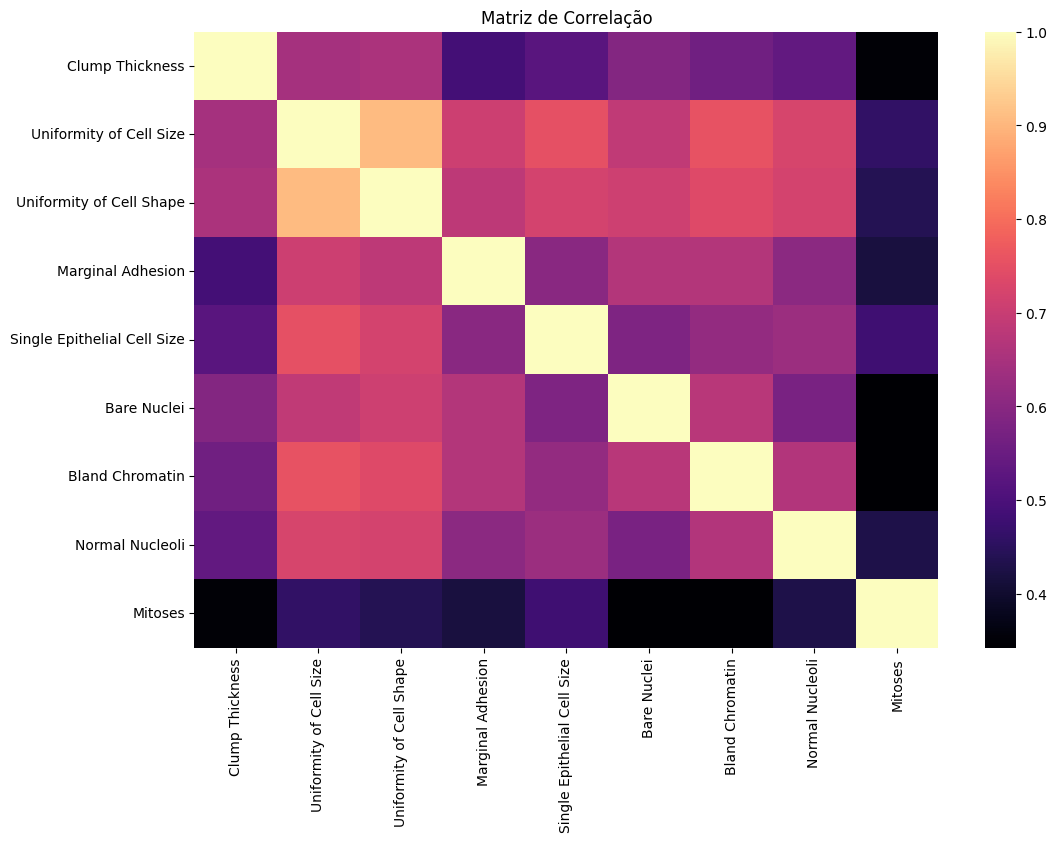

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Função para calcular a matriz de correlação e plotar o heatmap
def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='magma', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()

# Plotar a matriz de correlação
plot_correlation_heatmap(df2)

In [ ]:
def select_features_with_pca(df, threshold=0.95):
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    selected_features = df.columns[cumulative_variance_ratio <= threshold]
    return selected_features

# Selecionar os atributos usando PCA
selected_features = select_features_with_pca(df2)
print("Atributos selecionados com PCA:")
print(selected_features)
print(len(selected_features))

Atributos selecionados com PCA:
Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei'],
      dtype='object')
6


In [ ]:
df_novo = df2[selected_features].copy()

df_novo.loc[:,'Class'] = target
print("Novo DataFrame com os atributos selecionados pelo PCA e a coluna target:")
df_novo

Novo DataFrame com os atributos selecionados pelo PCA e a coluna target:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Class
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,2
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,2
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,2
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,2
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,2
...,...,...,...,...,...,...,...
694,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.410685,2
695,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,2
696,0.206936,2.251526,2.287222,0.067687,1.710106,-0.134392,4
697,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.141902,4


In [ ]:
valores_ausentes = df_novo.isnull().sum(axis=0) #Verificando se existem valores ausentes
print('Quantidade de valores faltantes para cada variável do dataset Pós etapa de pré-processamento:')
print(valores_ausentes)


Quantidade de valores faltantes para cada variável do dataset Pós etapa de pré-processamento:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Class                          0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_novo.drop(columns='Class'), target, test_size=0.2, stratify=target, random_state=12345)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def balancear(X, y):

    oversampler = RandomOverSampler(random_state=12345)

    X_balanced, y_balanced = oversampler.fit_resample(X, y)

    return X_balanced, y_balanced

X_balanced, y_balanced = balancear(X_train, y_train)


#Sobre o pré-processamento



*  Inicialmente dropamos a coluna 'Sample code number' pois ela só cumpria o papel de identificação das amostras e, portanto, não influenciaria no treinamento.
*   Depois disso, verificamos se havia valores faltantes, constatando que a coluna 'Bare Nuclei' possuía 16 valores desse tipo.
* A partir disso, decidimos para cada coluna: caso houvesse, substituir os valores faltantes pelo valor mais frequente e, após isso, normatizar os valores. Optamos por preencher os valores faltantes com a moda pois, apesar do atributo 'Bare Nuclei' ser do tipo float, ele possuia apenas 10 valores únicos/diferentes.
* Selecionamos as features que preservavam 95% através do PCA e montamos um novo conjunto a partir delas. Reduzimos o conjunto original de 10 atributos para 6.
* Por último, balanceamos o conjunto usando o Oversampling.






###**Questão 2: Verificar se existem dados nulos.**

Feito na questão anterior.

### **Questão 3**
Verifique se existem outliers e  quais atributos possuem outliers.
Crie um novo conjunto de dados, eliminando os outliers e considere esse novo conjunto para resolver os itens seguintes.

Para verificar a presença de outliers nos dados e criar um novo conjunto de dados eliminando esses outliers, podemos usar o método do Z-score ou o método do IQR (Interquartile Range). Vamos usar o método do IQR, pois consideramos mais robusto em relação a distribuições não normais.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def identify_and_remove_outliers(df):
    # Calcular Q1 (percentil 25) e Q3 (percentil 75) para os atributos numéricos
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1  # Intervalo Interquartil (IQR) é a diferença entre Q3 e Q1

    # Identificar outliers: valores menores que Q1 - 1.5 * IQR ou maiores que Q3 + 1.5 * IQR
    is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    # Criar uma máscara que é True para linhas sem outliers
    no_outliers_mask = ~is_outlier.any(axis=1)

    # Criar um novo DataFrame sem os outliers
    df_no_outliers = df[no_outliers_mask]

    return df_no_outliers, is_outlier

# Criar um novo DataFrame removendo os outliers
df_no_outliers, outliers = identify_and_remove_outliers(df_novo)

# Exibir o novo tamanho do DataFrame após a remoção dos outliers
print(df_no_outliers.shape)

# Mostrar a quantidade de outliers detectados para cada variável do dataset
print('Quantidade de outliers para cada variável do dataset:')
print(outliers.sum())

# Verificar novamente os valores ausentes após a remoção dos outliers
valores_ausentes_no_outliers = df_no_outliers.isnull().sum(axis=0)
print('Quantidade de valores faltantes para cada variável do dataset após remoção dos outliers:')
print(valores_ausentes_no_outliers)

# Separar os dados em conjuntos de treinamento e teste
X = df_no_outliers.drop(columns='Class')  # Atributos preditivos
y = df_no_outliers['Class']                      # target

X_train, X_test, y_train, y_test = train_test_split(
    X,                                    # Atributos preditivos
    y,                                    # Rótulo alvo
    test_size=0.2,                        # Proporção do conjunto de teste
    stratify=y,                           # Estratificar para manter a distribuição das classes
    random_state=12345                    # Semente aleatória para reprodutibilidade
)

# Função para balancear o conjunto de dados de treinamento
def balancear(X, y):
    oversampler = RandomOverSampler(random_state=12345)  # Inicializar o RandomOverSampler
    X_balanced, y_balanced = oversampler.fit_resample(X, y)  # Aplicar o oversampling para balancear as classes
    return X_balanced, y_balanced

# Balancear o conjunto de treinamento
X_balanced, y_balanced = balancear(X_train, y_train)

# Verificar os tamanhos dos conjuntos de treinamento e teste após o balanceamento
print('Tamanho do conjunto de treinamento balanceado:', X_balanced.shape)
print('Tamanho do conjunto de teste:', X_test.shape)


(600, 7)
Quantidade de outliers para cada variável do dataset:
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion              60
Single Epithelial Cell Size    54
Bare Nuclei                     0
Class                           0
dtype: int64
Quantidade de valores faltantes para cada variável do dataset após remoção dos outliers:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Class                          0
dtype: int64
Tamanho do conjunto de treinamento balanceado: (724, 6)
Tamanho do conjunto de teste: (120, 6)


1. Quantidade de outliers para cada variável:
- Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape e Bare Nuclei não possuem outliers detectados.
- Marginal Adhesion possui 60 outliers.
- Single Epithelial Cell Size possui 54 outliers.

2. Quantidade de valores faltantes após a remoção dos outliers:
- Não há valores faltantes em nenhuma das variáveis do dataset após a remoção dos outliers.

3. Tamanho dos conjuntos de treinamento e teste:
- O conjunto de treinamento balanceado tem 724 instâncias e 6 atributos.
- O conjunto de teste tem 120 instâncias e 6 atributos.

Observações consideráveis:
- A remoção dos outliers foi eficaz para limpar o dataset e eliminar os valores discrepantes que poderiam distorcer a análise.
- A ausência de valores faltantes após a remoção dos outliers indica que não houve necessidade de imputação de dados para preencher valores ausentes.
- O conjunto de treinamento foi balanceado utilizando a técnica de oversampling (RandomOverSampler), o que é importante para evitar desequilíbrios nas classes durante a modelagem de algoritmos de aprendizado de máquina.


### **Questão 4**
Treine um modelo de regressão com o método DT, no conjunto de treino e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar e treinar o modelo Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(random_state=12345)
modelo_arvore.fit(X_balanced, y_balanced)

# Prever os rótulos no conjunto de teste
y_pred_arvore = modelo_arvore.predict(X_test)

# Calcular as métricas de desempenho
acuracia_arvore = accuracy_score(y_test, y_pred_arvore)
precisao_arvore = precision_score(y_test, y_pred_arvore, pos_label=4)
recall_arvore = recall_score(y_test, y_pred_arvore, pos_label=4)
f1_arvore = f1_score(y_test, y_pred_arvore, pos_label=4)

# Exibir as métricas de desempenho
print("\nMétricas de Desempenho do Modelo Árvore de Decisão:")
print("Acurácia:", acuracia_arvore)
print("Precisão:", precisao_arvore)
print("Recall:", recall_arvore)
print("F1-score:", f1_arvore)



Métricas de Desempenho do Modelo Árvore de Decisão:
Acurácia: 0.9333333333333333
Precisão: 0.8387096774193549
Recall: 0.896551724137931
F1-score: 0.8666666666666666


- O conjunto de dados foi tratado para lidar com possíveis outliers e valores ausentes, o que pode ter contribuído para o bom desempenho do modelo.


### **Questão 5**
Treine um modelo de classificação com o **método RF**, no conjunto de treino  e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste. Determine usando o modelo RF os atributos mais relevantes.

Métricas de Desempenho do Modelo Random Forest:
Acurácia: 0.9583333333333334
Precisão: 0.875
Recall: 0.9655172413793104
F1-score: 0.9180327868852458
Atributos mais relevantes:
                       Feature  Importance
1      Uniformity of Cell Size    0.303463
2     Uniformity of Cell Shape    0.265463
5                  Bare Nuclei    0.195860
0              Clump Thickness    0.106646
4  Single Epithelial Cell Size    0.101182
3            Marginal Adhesion    0.027387


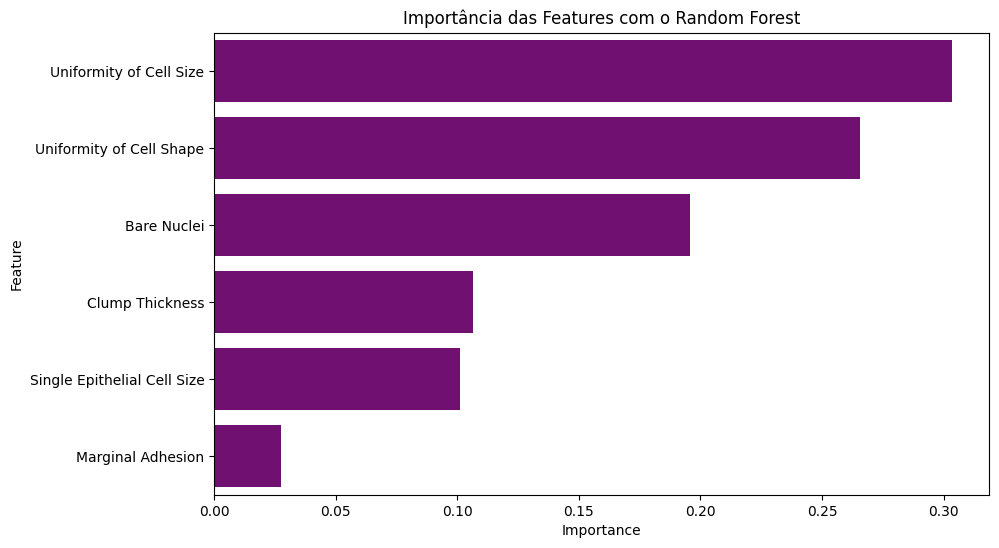

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#X_train, X_test, y_train, y_test = train_test_split(df_novo.drop(columns='Class'), target, test_size=0.2, stratify=target, random_state=12345)

# Inicializar e treinar o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=12345)
modelo_rf.fit(X_balanced, y_balanced)

# Prever os rótulos no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

# Calcular as métricas de desempenho
acuracia_rf = accuracy_score(y_test, y_pred_rf)
precisao_rf = precision_score(y_test, y_pred_rf, pos_label=4)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=4)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=4)

# Exibir as métricas de desempenho
print("Métricas de Desempenho do Modelo Random Forest:")
print("Acurácia:", acuracia_rf)
print("Precisão:", precisao_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


important_features = modelo_rf.feature_importances_
feature_names = X.columns

# Criando um DataFrame para armazenar a relevância dos atributos
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': important_features})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# printando a relevância
print("Atributos mais relevantes:")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,color='purple')
plt.title('Importância das Features com o Random Forest')
plt.show()



### **Questão 6**

Treine um modelo de classificação com o método XGBoost, no conjunto de treino  e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

- Dica: Utilize `xgboost.XGBRegressor`

Métricas de Desempenho do Modelo XGBoost:
Acurácia: 0.95
Precisão: 0.8484848484848485
Recall: 0.9655172413793104
F1-score: 0.9032258064516129
Atributos mais relevantes:
                       Feature  Importance
2     Uniformity of Cell Shape    0.476938
1      Uniformity of Cell Size    0.341336
5                  Bare Nuclei    0.094904
0              Clump Thickness    0.045379
4  Single Epithelial Cell Size    0.025079
3            Marginal Adhesion    0.016363


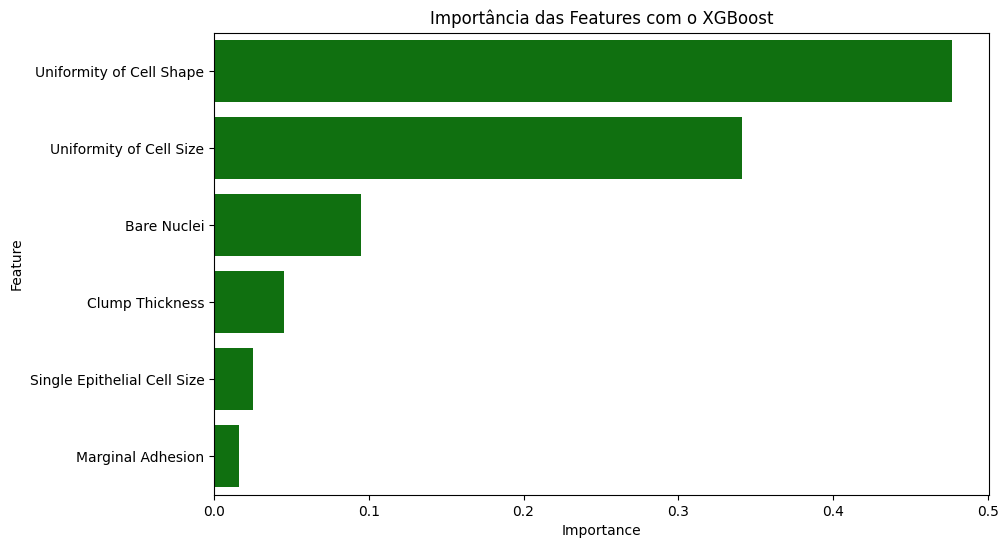

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Dividir os dados em conjunto de treinamento e teste (usando o mesmo random_state)
#X_train, X_test, y_train, y_test = train_test_split(df_novo.drop(columns='Class'), target, test_size=0.2, stratify=target, random_state=12345)

# Mapear os rótulos de classe para 0 e 1
y_train_mapped = y_balanced.map({2: 0, 4: 1})
y_test_mapped = y_test.map({2: 0, 4: 1})

# Treinar o modelo XGBoost com o mesmo conjunto de treinamento/teste
modelo_xgb = xgb.XGBClassifier(random_state=12345)
modelo_xgb.fit(X_balanced, y_train_mapped)

# Prever os rótulos no conjunto de teste
y_pred = modelo_xgb.predict(X_test)

# Calcular as métricas de desempenho
acuracia_xgb = accuracy_score(y_test_mapped, y_pred)
precisao_xgb = precision_score(y_test_mapped, y_pred)
recall_xgb = recall_score(y_test_mapped, y_pred)
f1_xgb = f1_score(y_test_mapped, y_pred)

# Exibir as métricas de desempenho
print("Métricas de Desempenho do Modelo XGBoost:")
print("Acurácia:", acuracia_xgb)
print("Precisão:", precisao_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)


# Extrair a importância das features
important_features = modelo_xgb.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': important_features})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Atributos mais relevantes:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,color='green')
plt.title('Importância das Features com o XGBoost')
plt.show()


- Existe um problema na base de dados "Breast Cancer Wisconsin" relacionado à codificação dos rótulos de classe. Originalmente, os tumores benignos são codificados como 2 e os tumores malignos como 4. No entanto, muitos algoritmos de aprendizado de máquina, incluindo o XGBoost, esperam que os rótulos de classe sejam 0 e 1.

- Para resolver esse problema, tratamos a codificação dos rótulos de classe antes de treinar o modelo XGBoost. Utilizamos a função LabelEncoder do scikit-learn para mapear os rótulos 2 e 4 para 0 e 1, respectivamente. Isso garante que os rótulos de classe estejam em conformidade com as expectativas do modelo.

- Essa é uma etapa crucial no pré-processamento dos dados ao lidar com algoritmos que têm requisitos específicos para a codificação dos rótulos de classe. Garantir que os rótulos estejam corretamente codificados é fundamental para o treinamento de modelos de aprendizado de máquina e para a obtenção de resultados precisos e confiáveis.

### **Questão 7**

Compare seus resultados com os modelos dos exercícios anteriores.

- Dica: Cuidado para usar o mesmo train/test split em todos os modelos para que a comparação faça sentido. Para isso você pode utilizar o mesmo `random_state` na função `train_test_split` nos dois métodos.




Divisão dos Dados:

- train_test_split é usado com random_state=12345 para garantir que a divisão é a mesma para todos os modelos, permitindo uma comparação justa.

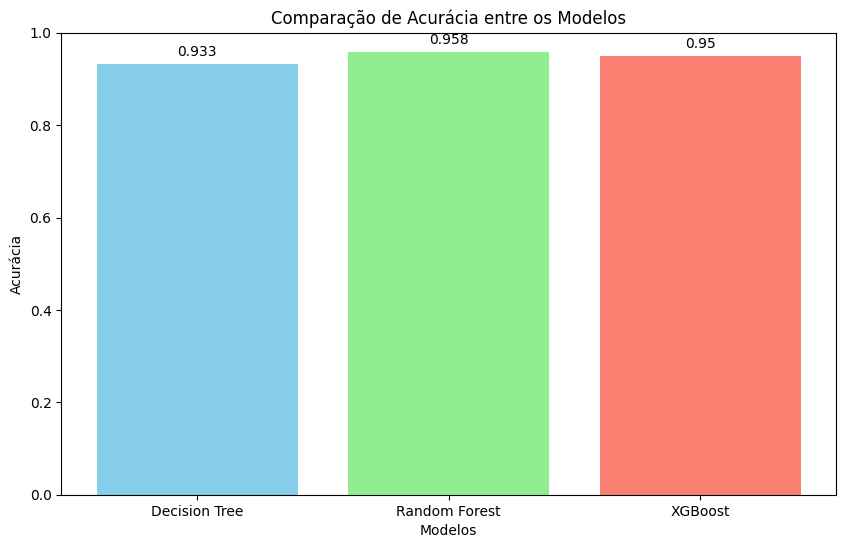

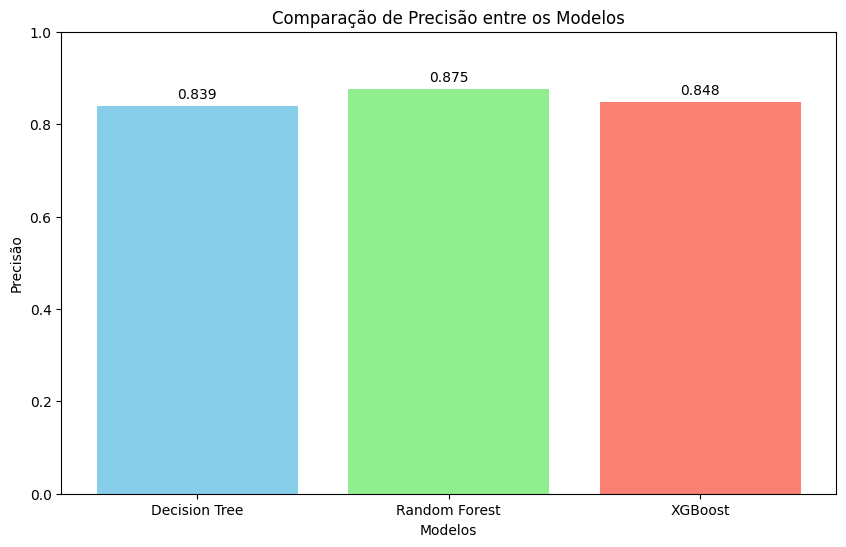

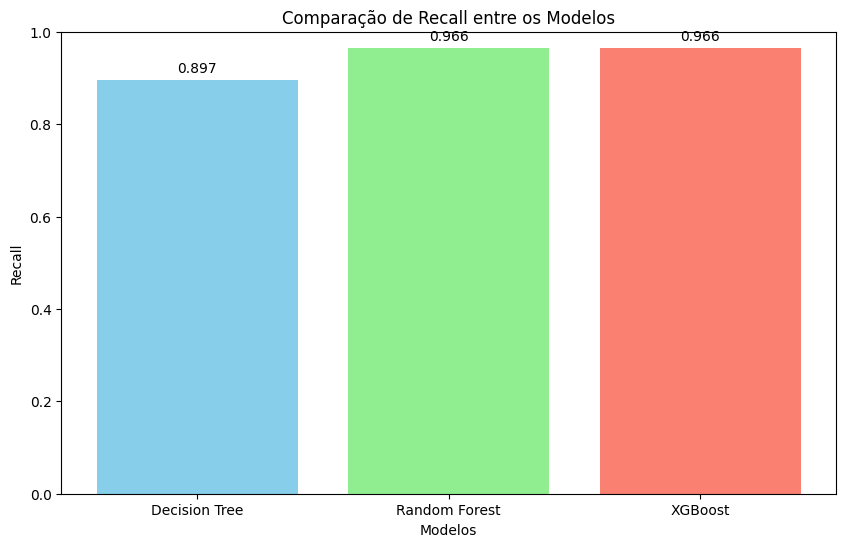

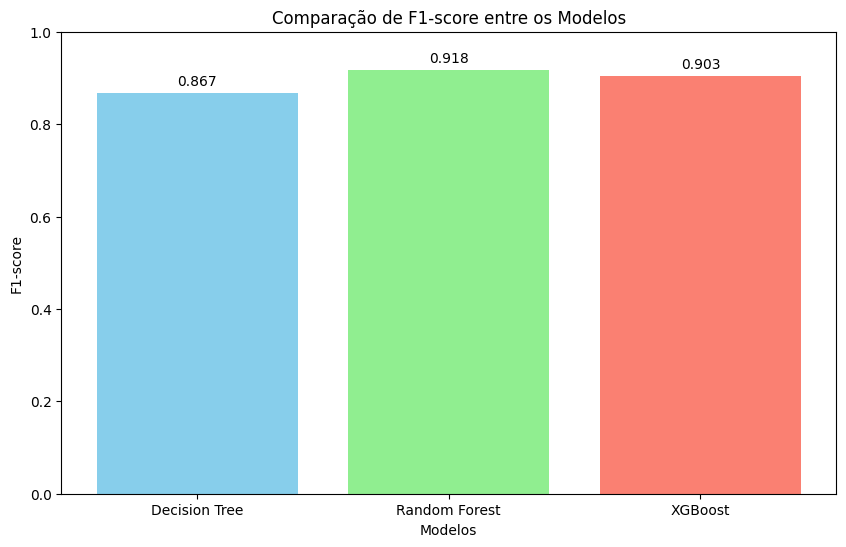

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas dos modelos
metricas = {
    'Modelo': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Acurácia': [acuracia_arvore, acuracia_rf, acuracia_xgb],
    'Precisão': [precisao_arvore, precisao_rf, precisao_xgb],
    'Recall': [recall_arvore, recall_rf, recall_xgb],
    'F1-score': [f1_arvore, f1_rf, f1_xgb]
}

# Plotando as métricas
def plot_metricas(metricas, metric_name):
    modelos = metricas['Modelo']
    valores = metricas[metric_name]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(modelos, valores, color=['skyblue', 'lightgreen', 'salmon'])
    plt.xlabel('Modelos')
    plt.ylabel(metric_name)
    plt.title(f'Comparação de {metric_name} entre os Modelos')
    plt.ylim(0, 1)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()

# Plotando todas as métricas
plot_metricas(metricas, 'Acurácia')
plot_metricas(metricas, 'Precisão')
plot_metricas(metricas, 'Recall')
plot_metricas(metricas, 'F1-score')


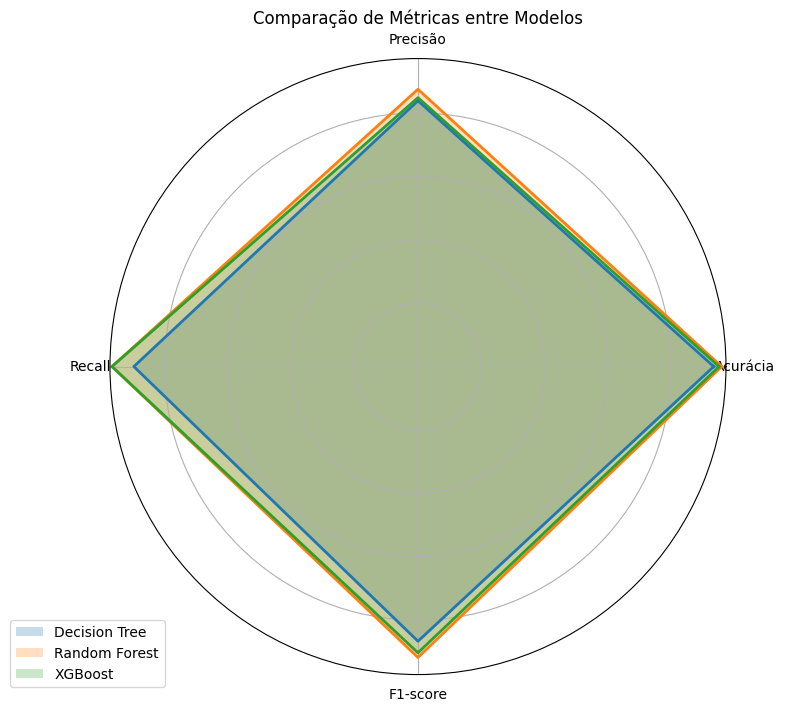

In [ ]:
import matplotlib.pyplot as plt

# Função para criar gráficos de radar
def plot_radar(metricas):
    labels = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
    num_vars = len(labels)

    # Ângulos dos eixos
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Completar a volta
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for modelo in metricas['Modelo']:
        valores = [
            metricas['Acurácia'][metricas['Modelo'].index(modelo)],
            metricas['Precisão'][metricas['Modelo'].index(modelo)],
            metricas['Recall'][metricas['Modelo'].index(modelo)],
            metricas['F1-score'][metricas['Modelo'].index(modelo)]
        ]
        valores += valores[:1]  # Completar a volta
        ax.fill(angles, valores, alpha=0.25, label=modelo)
        ax.plot(angles, valores, linewidth=2, linestyle='solid')

    # Títulos dos eixos
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Adicionar legenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Título
    plt.title('Comparação de Métricas entre Modelos')
    plt.show()

# Plotar gráfico de radar
plot_radar(metricas)


O gráfico acima cria um radar que compara todas as métricas de desempenho (Acurácia, Precisão, Recall e F1-score) entre os três modelos (Decision Tree, Random Forest e XGBoost). Cada linha colorida no gráfico delimita um modelo e cada eixo representa uma métrica. A área delimitada por cada linha colorida ajuda a visualizar e comparar rapidamente o desempenho dos modelos em todas as métricas simultaneamente.

### **Questão 8**

Verifique a importância de cada feature para o resultado final utilizando o melhor modelo. O que isso diz sobre o problema que estamos tentando resolver?

Análise das Features Mais Importantes
Conforme o gráfico dos dois últimos modelos, as features como "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei" e  "Clump Thickness" se destacaram como as mais importantes. Essas características são cruciais porque:

* Uniformity of Cell Size e Cell Shape:

Estas features indicam quão uniformes são o tamanho e a forma das células no tecido do tumor. Uma alta variação pode indicar atividade celular anormal, que é típica de tumores malignos. Sua alta importância sugere que essas medidas são vitais para a classificação precisa de tumores.

* Bare Nuclei:

Atributo que  mede se o núcleo está suficientemente "envelopado" pelo citoplasma. Núcleos nus são mais comuns em tumores malignos. Por isso, tal atributo desempenha um importante papel na detecção da benignidade ou não de um tumor, umma vez que uma alta taxa de 'Bare Nuclei' tende a indicar que o tumor é maligno.

* Clump Thickness:

Refere-se à espessura dos aglomerados celulares no tecido examinado. Uma maior espessura pode estar associada a uma maior probabilidade de malignidade. Sua importância no modelo implica que essa característica é um forte indicador do potencial maligno do tumor.

* O que isso diz sobre o problema que estamos tentando resolver?

O problema central que estamos tentando resolver é a classificação eficaz e precisa de tumores como benignos ou malignos para auxiliar no diagnóstico e tratamento do câncer de mama. As implicações das features mais importantes são significativas:

  ** Foco em Características Críticas para Diagnósticos: Ao identificar as características mais relevantes para a classificação de tumores, o modelo ajuda a concentrar os esforços de diagnóstico nessas áreas, o que pode levar a diagnósticos mais rápidos e precisos.

  ** Desenvolvimento de Melhores Práticas Médicas: Com a compreensão de quais características são mais importantes, os médicos e pesquisadores podem desenvolver melhores protocolos para a avaliação de biópsias e exames de imagem.

  ** Potencial para Personalização de Tratamentos: Entender quais características são mais indicativas de malignidade pode ajudar no desenvolvimento de abordagens de tratamento mais personalizadas e focadas

* Conclusão

A importância das features revelada pelo modelo XGBoost não só valida a eficácia do modelo em termos de suas métricas de performance (acurácia, precisão, recall, F1-score) mas também oferece insights valiosos sobre quais aspectos da patologia do tumor são mais críticos para o diagnóstico e tratamento do câncer de mama. Isso ressalta o valor da machine learning como ferramenta de apoio na decisão médica, proporcionando uma base mais sólida para intervenções clínicas precisas e eficazes.